In [184]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in the data

df = pd.read_csv(r"C:\Users\LENOV\Downloads\Video\Portfolio Project\Python Project 4\movies.csv\movies.csv")


In [185]:
# Looking in to all the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [131]:
# Checking Missing DATA

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [132]:
#DATA TYPES FOR COLUMNS

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [186]:
#Change data Types of columns



df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

df.head()

C:\Users\LENOV\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [167]:
#Create cortrect year column

df['yearcorrect']= df['released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [113]:
# Let sort the table according to the gross value in Ascending Order
df = df.sort_values(by= ['gross'], inplace = False , ascending =False)



In [54]:
# let make our rows and columns visible in maximum size

pd.set_option('display.max_rows', None)

In [187]:
#Drop any duplicates

df.drop_duplicates()
df.drop_duplicates(inplace=True)

In [169]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


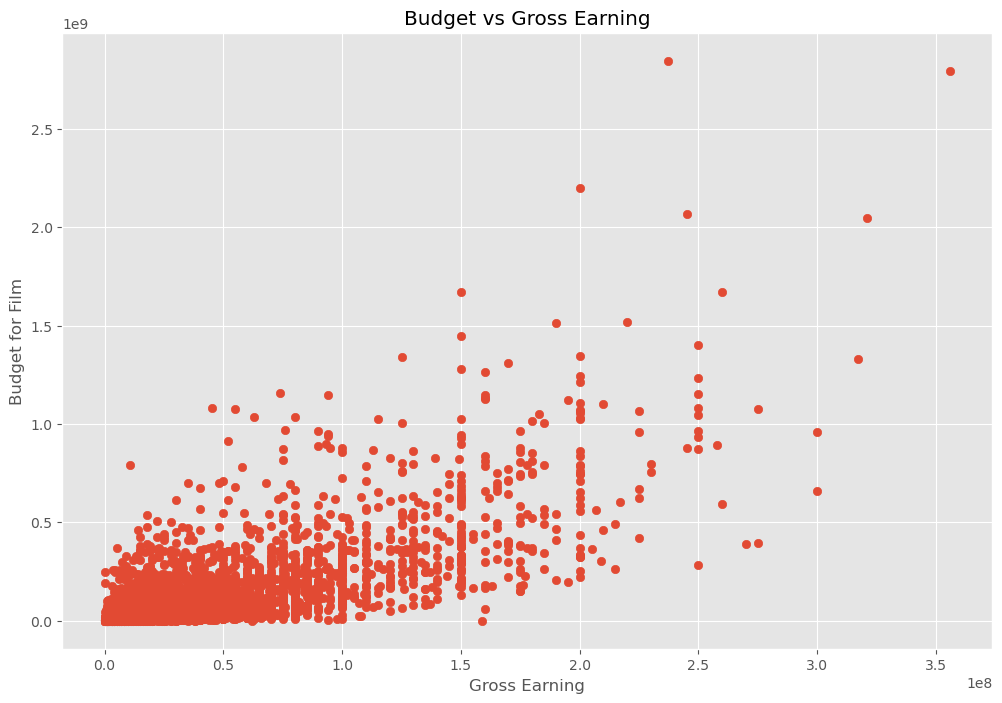

In [135]:
#Scatter plot with budget vs gross


plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earning')

plt.xlabel('Gross Earning')

plt.ylabel('Budget for Film')

plt.show()

In [181]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13


<Axes: xlabel='budget', ylabel='gross'>

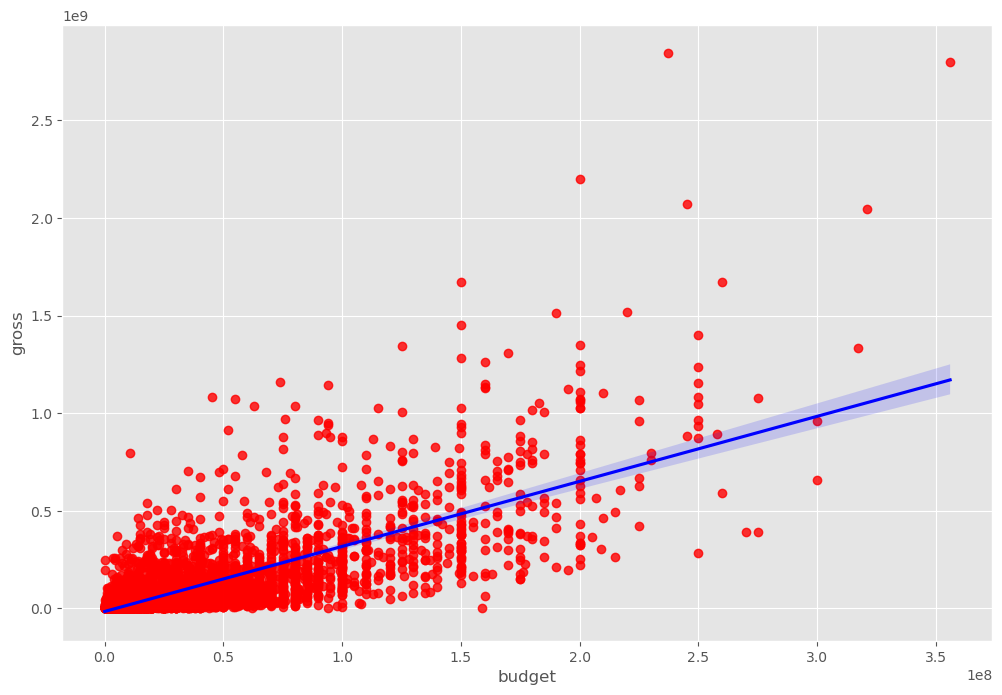

In [137]:
# Plot the budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [138]:
# Let's start looking at Correllation



In [139]:
df.corr(method ='pearson') #pearson,kendall,spearman

C:\Users\LENOV\AppData\Local\Temp\ipykernel_12376\1146296296.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson') #pearson,kendall,spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [140]:
#High Correlation between budget and Gross

C:\Users\LENOV\AppData\Local\Temp\ipykernel_12376\846375711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

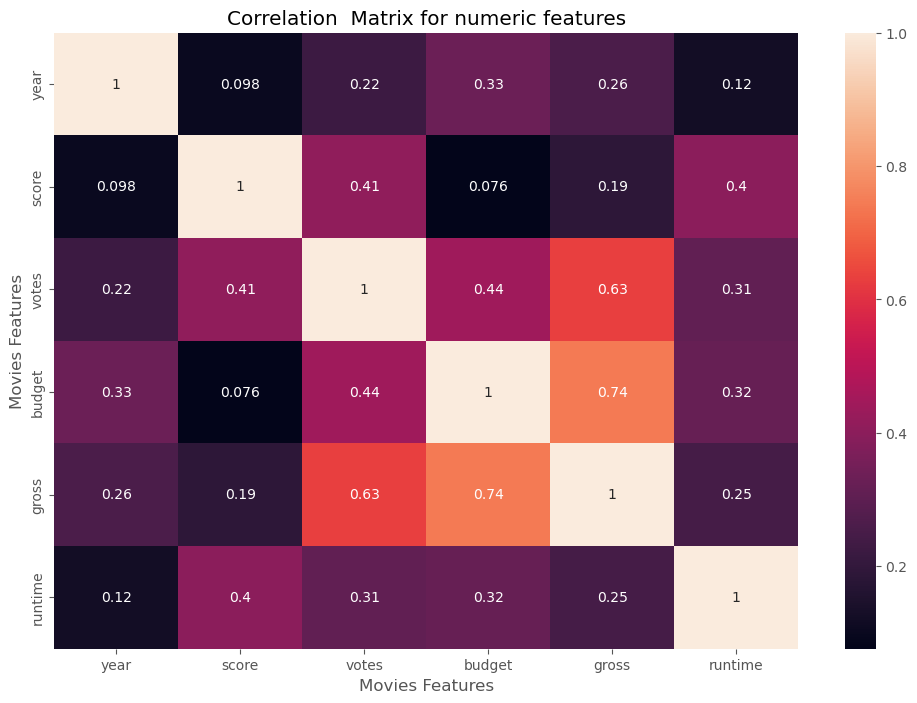

In [141]:
correlation_matrix = df.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation  Matrix for numeric features')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')


plt.show

In [178]:
#Checking at the company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13


In [179]:
df_numerized = df

for col_name in  df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13


In [173]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


<function matplotlib.pyplot.show(close=None, block=None)>

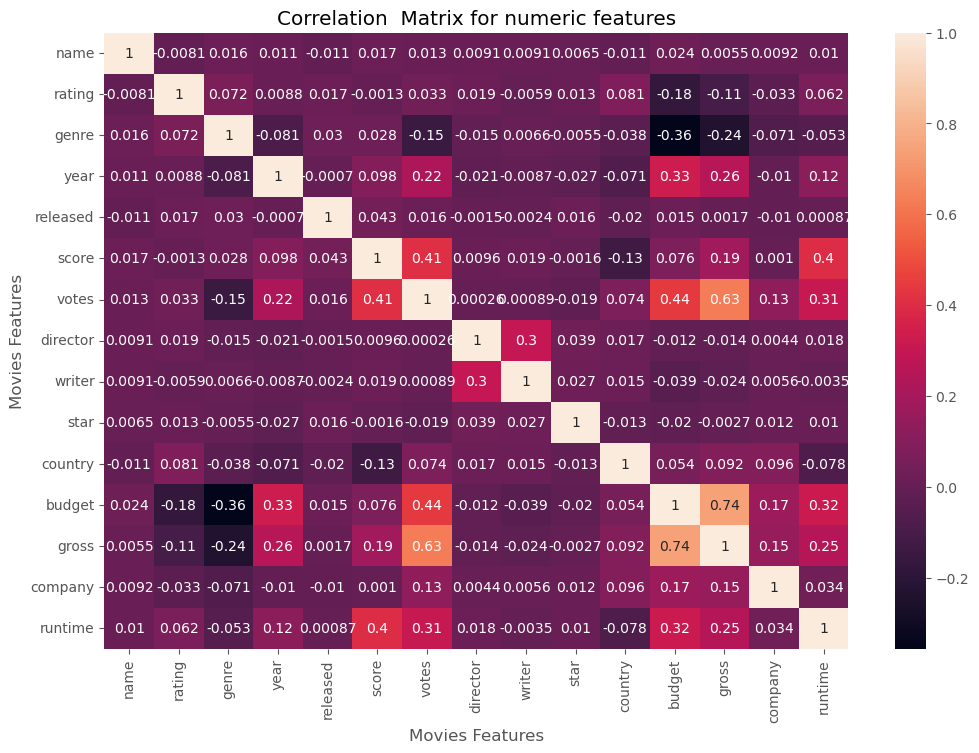

In [143]:
correlation_matrix = df_numerized.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation  Matrix for numeric features')

plt.xlabel('Movies Features')

plt.ylabel('Movies Features')


plt.show

In [171]:
df_numerized.corr()

C:\Users\LENOV\AppData\Local\Temp\ipykernel_12376\1284351489.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.169406,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.573889,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012442,0.010174


In [159]:
correlation_mat = df_numerized.corr()

corr_pairs  = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.013895
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [152]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [153]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes and Budget has the highest Correlation
#Company has the lowest Correlation